# 학습 관련 기술들

# 매개변수 갱신

목적: 손실함수의 값을 가능한 낮추는 매개변수를 찾는 것

## SGD 확률적 경사 하강법

매개변수의 기울기(미분)를 이용하여 기울어진 방향으로 매개변수 값을 갱신하는 방법  
![sgd](http://drive.google.com/uc?id=164TjO-x6nKOFkR75bxnVG3s2tuU2x3RH)

### code
```py
# SGD 구현
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
```
```py
# 신경망 매개변수 진행(전체 흐름만 보면 됨)
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)  # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...
```

> **optimizer**  
최적화를 행하는 자, 매개변수를 갱신해주는 역할이다. 그래서 위 코드를 보면 매개변수params와 기울기grads를 넘겨주기만 한다.  
  

### SGD 단점  
- 비등방성 함수(방향에 따라 성질(기울기)이 달라지는 함수)에서는 탐색 경로가 비효율적이다. 즉, SGD는 기울기가 가르키는 방향으로 무조건 이동하므로 지그재그형태가 발생해 시간에 비해 학습률의 성장이 낮아지는 단점이 있다.  
> **등방성이란?**  
모든 좌표에 대해서 기울기가 항상 중앙을 가르키고 있다. 즉, f함수는 "기울기가 가르키는 지점"이라는 성질에 대해서 등방성을 가지고 있다.
![sgd2](http://drive.google.com/uc?id=12MSZ3nhQzfzvLBU5YEgVc8hfg63SbeY-)  
> **비등방성이란?**  
기울기가 가르키는 지점이 하나가 아니라 여러가지이고 일정하지 않다.
![sgd2](http://drive.google.com/uc?id=1oEt0O57CyrrB_gOVpdn2MGQPesB8Rf9F)

<br><br><br><br>

## Momentum 모멘텀

모멘텀은 운동량을 의미하며 Momentum Optimizer는 매개변수의 이동에 속도를 부여하는 것을 의미한다.  
쉽게 말해서 구슬을 떨어트리면 급한 경사에서는 더 빨라지듯이 매개변수의 변화에도 속도를 부여하는 것이다.  
  
$v\leftarrow \alpha v-\eta \frac{\partial L}{\partial W}$ 　　$W\leftarrow W+v$
- W : 가중치매개변수
- $\frac{\partial L}{\partial W}$ : 손실함수의 기울기
- $\eta$ : 학습률
- v : 속도
- $\alpha v$ : 물체가 아무런 힘을 받지 않을 때 서서히 하강시킴, 만약 매개변수가 0이 되어 아무런 힘을 받지 않는다면 서서히 속도를 감소시키기 위해서 사용되며 보통 0.9를 사용

### code

In [9]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None  # 물체 속도 -> {}
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
                params[key] += self.v[key]

### SGD vs Momentum

![sgd](http://drive.google.com/uc?id=18fG4T1XyQdTVVHvO9s8ZLamMu8YFk-V7)
x축의 힘은 아주 작지만 항상 같은 방향을 가르키므로 양의 가속도로 작용하여 SGD에 비해서 지그재그의 비율이 줄어들었으나, y축은 힘은 크지만 위아래로 번갈아 상충하여 속도가 안정적이지 않다. 전체적으로 보면 SGD보다 x축방향으로 빠르게 다가가 지그재그 움직임지 줄어든 것을 볼 수 있다.

### Momentum 장단점

- 장점
  - 자주 이동하는 방향에 관성이 걸리게 되고, 진동을 하더라도 중앙으로 가는 방향에 힘을 얻기 때문에 SGD에 비해 상대적으로 빠르게 이동할 수 있다.
  - SGD가 가지고 있는 또 다른 문제인 Local Minima를 해결할 수 있다.
- 단점
  -  W를 업데이트 할 때마다, 과거에 이동했던 양을 변수별로 저장해야하므로 변수에 대한 메모리가 2배로 소모된다.
  
<br><br><br><br>

## AdaGrad

지금까지 많이 변화한 매개변수는 적게 변화하도록, 반대로 적게 변화한 매개변수는 많이 변화하도록 learning late의 값을 조절하는 개념  

$h \leftarrow h+\frac{\partial L}{\partial W}\odot \frac{\partial L}{\partial W}$　　　$W\leftarrow W-\eta \frac{1}{\sqrt{h}} \frac{\partial L}{\partial W}$  
- h : 손실함수의 기울기를 제곱하여 계속 더해줌.
- $\odot$ : 행렬의 원소별 곱셈

매개변수를 갱신할 때 $\frac{1}{\sqrt{h}}$을 곱해 학습률을 조정하는데, 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다. 즉 원소마다 다르게 적용된다.  
   
### code
```py
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
```


![adagrad](http://drive.google.com/uc?id=1V2FIeRLpWn8mXOTGhaHJh6DNuuzVFJDv)  
y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정된다. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다.

### 단점
h의 값은 항상 양으로 커지기 때문에 매개변수가 매우 크게 이동하여 h의 값이 무한대로 커진다면 해당 매개변수의 학습이 정체될 수 있다.  

<br><br><br><br>

## Adam

AdaGrad는 매개변수의 원소마다 적응적으로 갱신정도를 조정했고, 모멘텀은 속도를 가중치(관성)로 적용했다. Adam은 모멘텀과 AdaGrad를 융합한 기법이다. 이 방법은 매개변수의 공간을 효율적으로 탐색해주고, 하이퍼파라미터의 편향보정이 진행된다는 점도 특징이다.

> 어떤 블로그를 보다보면 RMSProp + Momentum 방식을 섞은 것이라하기도 하고, AdaGrad + Momentum라고 하기도 한다. 크게 다른 말은 아니다. RMSProp이 AdaGrad를 개선해서 나온 것이기 때문이다.  


![adagrad](http://drive.google.com/uc?id=1BOXkW5TzhePpwiwIcJ_8AhxZ3wcBHp5_)  

## optimizer 참고

https://nittaku.tistory.com/271
![adagrad](http://drive.google.com/uc?id=10RhKZIFAOAv8aX621nxlndGFZ2iZiyIf)  

# 가중치의 초깃값

## 초깃값을 0으로 하면?

오버피팅을 억제해 범용 성능을 높이는 기술을 **가중치 감소(weight decay)**라고 한다. 가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것이다.  
그럼 애초에 가중치 초깃값을 0으로 설정해주면 어떨까?  

정확히 말하면 가중치를 균일한 값으로 설정해서는 안된다.
- Backpropagation에서 모든 가중치의 값이 똑같이 갱신됨 
- 가중치들은 같은 초기값에서 시작하고 갱신을 거쳐도 여전히 같은 값을 유지
- 가중치가 고르게 되는 상황을 피하려면 초기값을 무작위로 설정

## 은닉층의 활성화 값 분포

### 표준편차가 1

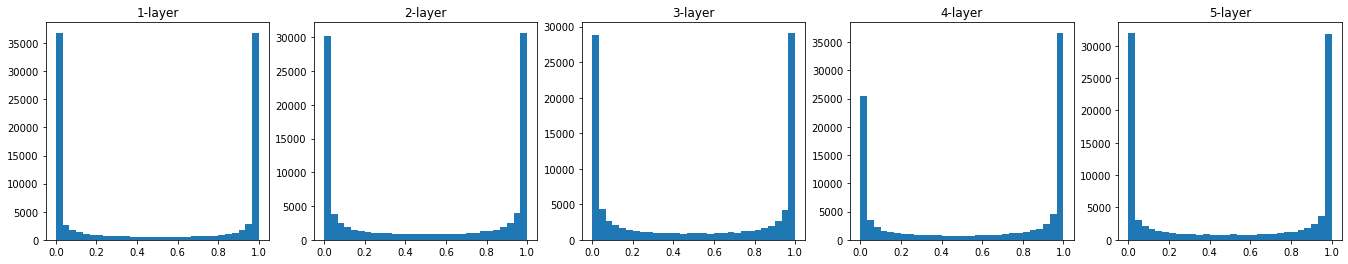

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100                  # 각 은닉층의 노드(뉴런)수
hidden_layer_size = 5           # 은닉층이 5개
activations = {}                # 이 곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.subplots_adjust(left=2, right=5)

plt.show()

<br>

활성화함수가 시그모이드 함수인 경우 각 층들의 활성화값들이 0과 1에 주로 분포되어 있는 것을 볼 수 있다.   
이는 시그모이드 함수의 미분 값이 0에 가까워지도록 한다.  
따라서 역전파의 기울기 값은 점점 작아지다가 사라지는 Gradient Vanishing(기울기 소실) 문제가 발생하며 층이 깊어질수록 기울기는 더 사라진다.

<br>

### 표준편차가 0.01

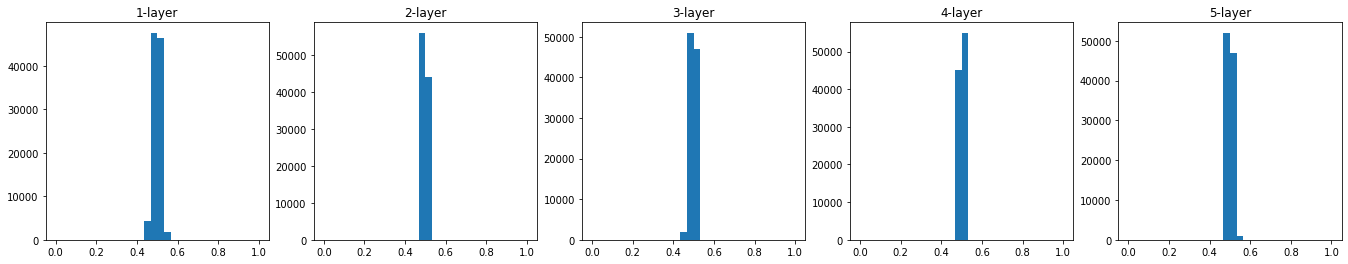

In [33]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01  # 가중치의 표준편차 1 -> 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.subplots_adjust(left=2, right=5)

plt.show()

<br>

기울기가 사라지는 문제는 발생하지 않았으나 0.5 주변으로 값이 여전히 치우쳐있기 때문에 뉴런을 다수 사용한 이점이 없다.  
뉴런 100개가 똑같은 값을 출력한다면 100개가 다 필요한 이유가 없다.

<br>

### Xavier 초깃값

앞 층의 입력 노드 수에 더하여 다음 계층의 출력 노드 수를 함께 고려하여 초기값을 설정하는 방법  

초깃값의 표준편차가 $\frac{1}{\sqrt{n}}$이 되도록 설정(n은 앞층의 노드 수)  

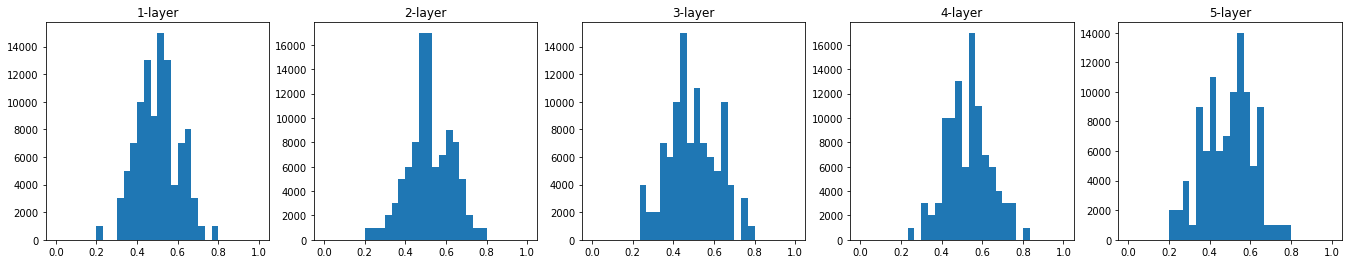

In [36]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.subplots_adjust(left=2, right=5)

plt.show()

<br>

앞의 두 방식보다 고르게 분포되어 학습이 효율적으로 이루어질 수 있음을 엿볼 수 있다. 시그모이드 함수를 사용했음에도 표현력의 문제가 발생하지 않는다.  

<br>

## ReLU 가중치 초깃값 설정 : He

He 초깃값은 ReLU에 특화된 초깃값이다.  

앞 계층의 노드가 n개일 때, 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 사용한다.  

![ReLU_He](http://drive.google.com/uc?id=1Yr_F6gb84-wTU0VR7sGh0-7Da_itTJPC)  

해석 결과
1. 표준편차가 0.01인 정규분포를 가중치 초깃값으로 사용한 경우 : 학습이 거의 이루어지지 않을 것으로 예상
2. Xavier 초깃값을 사용한 경우 : 층이 깊어지면서 치우침이 조금씩 커진다. 실제로 층이 깊어지면 활성화값들의 치우침도 커지고, 학습할 때 '기울기 소실'문제를 일으킨다.
3. He 초깃값을 사용한 경우 : 모든 층에서 균일하게 분포, 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것으로 기대할 수 있다.

> 활성화함수로 ReLU를 사용할 때 : He 초깃값  
> sigmoid나 tanh 등의 S자 모양 곡선일 때 : Xavier 초깃값

## MNIST 데이터셋으로 본 가중치 초깃값 비교

![MNIST-optimizer](http://drive.google.com/uc?id=12FviYiG2cxFOEN7OYWLKZOjLCCoeNFlm)  

- std=0.01 : 순전파 때 너무 작은 값이 흐르기 때문에, 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 않는다.
- He, Xavier : 둘 다 학습이 잘 되고 있으나, He가 좀 더 빨리 학습하는 것을 볼 수 있다.

# 배치정규화

## 목적 - Internal Covariate Shift
![Internal-Covariance-Shift](http://drive.google.com/uc?id=1SoU1f1keBOUaRs6ORKJCFo7VsYjkJ_0c)  
신경망이 깊어질수록 각 Layer를 지날때마다 활성화값의 분포가 점점 한쪽으로 치우치는 현상.  
이는 학습을 방해하는 요인으로, 이를 극복하고자 활성화값의 분포가 고르도록 정규화시키는 것.

<br>

## 배치 정규화 알고리즘
![batch_layer](http://drive.google.com/uc?id=1RhJTEgTZAVQ1gp435I0REKFuUP7lkZi8)  

$\mu _{B} \leftarrow \frac{1}{m}\sum_{i=1}^{m}x_{i}$  

$\sigma _{B}^{2}\leftarrow \frac{1}{m}\sum_{i=1}^{m}(x_{i}-\mu_{B})^2$  

$\hat{x_{i}}\leftarrow \frac{x_{i}-\mu_{B}}{\sqrt{\sigma _{B}^{2}+\epsilon }}$  
  
- 미니배치를 단위로 데이터 분포가 평균이 0, 분신이 1이 되도록 정규화한다.

$y_{i}\leftarrow \gamma \hat{x_{i}}+\beta $
- 정규화된 데이터에 고유한 확대(scale)와 이동(shift) 변환을 수행한다.
- 처음에는 $\gamma=1$, $\beta=0$부터 시작하고, 학습하면서 적합한 값으로 조정해간다.


<br>

## 효과
<img src="http://drive.google.com/uc?id=1O50-MhcSAACvF-_wAerEaCELtnNyPkwC" width="600">

- 가중치의 초깃값의 표준편차에 따른 배치정규화(실선), 사용하지 않은 경우(점선)를 나타낸 그래프  
- 거의 모든 경우에서 배치 정규화를 사용할 때 학습 진도가 빠르다.  
- 배치정규화를 이용하지 않는 경우 초깃값이 잘 분포되어 있지 않으면, 학습이 전혀 진행하지 않는 모습도 보인다.  

1. 학습을 빨리 진행할 수 있다.
2. 초깃값에 크게 의존하지 않는다.
3. 오버피팅을 억제한다.(드롭아웃 등의 필요성 감소)

<br>

## NLP에서의 배치정규화
- NLP(자연어처리)에서는 크게 효과가 없다고 한다.
- NLP는 이미지보다는 층이 얕은 모델을 주로 사용하기 때문에, 깊은 층에서 눈부신 활약을 하는 배치 정규화가 상대적으로 활약을 잘 못한다고 한다.  

참고 : https://stellarway.tistory.com/26

<br><br><br><br><br>

# 바른 학습을 위해

## overfitting

**훈련데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태**  

### 원인
- 매개변수가 많고 표현력이 높은 모델
- 훈련데이터가 적음

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
epoch:0, train acc:0.12666666666666668, test acc:0.1134
epoch:1, train acc:0.13666666666666666, test acc:0.1173
epoch:2, train acc:0.14666666666666667, test acc:0.1237
epoch:3, train acc:0.17333333333333334, test acc:0.1321
epoch:4, train acc:0.18333333333333332, test acc:0.1399
epoch:5, train acc:0.21, test acc:0.1503
epoch:6, train acc:0.22666666666666666, test acc:0.1613
epoch:7, train acc:0.23666666666666666, test acc:0.1698
epoch:8, train acc:0.23666666666666666, test acc:0.1745
epoch:9, train acc:0.23666666666666666, test acc:0.1685
epoch:10, train acc:0.24333333333333335, test acc:0.1785
epoch:11, train acc:0.27, test acc:0.1929
epoch:12, train acc:0.27, test acc:0.1881
epoch:13, train acc:0.3, test acc:0.2

epoch:154, train acc:0.92, test acc:0.6839
epoch:155, train acc:0.9166666666666666, test acc:0.6777
epoch:156, train acc:0.9166666666666666, test acc:0.6852
epoch:157, train acc:0.9333333333333333, test acc:0.6884
epoch:158, train acc:0.92, test acc:0.6836
epoch:159, train acc:0.92, test acc:0.6808
epoch:160, train acc:0.9166666666666666, test acc:0.669
epoch:161, train acc:0.93, test acc:0.6796
epoch:162, train acc:0.93, test acc:0.6867
epoch:163, train acc:0.93, test acc:0.6885
epoch:164, train acc:0.93, test acc:0.6926
epoch:165, train acc:0.93, test acc:0.6915
epoch:166, train acc:0.9366666666666666, test acc:0.6891
epoch:167, train acc:0.92, test acc:0.681
epoch:168, train acc:0.93, test acc:0.6869
epoch:169, train acc:0.9233333333333333, test acc:0.6829
epoch:170, train acc:0.93, test acc:0.6895
epoch:171, train acc:0.9266666666666666, test acc:0.6865
epoch:172, train acc:0.9233333333333333, test acc:0.6824
epoch:173, train acc:0.93, test acc:0.6872
epoch:174, train acc:0.9266666

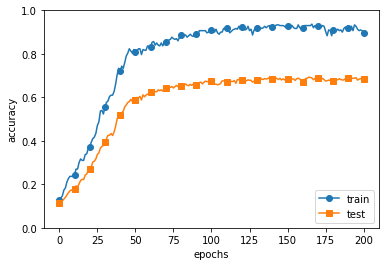

In [46]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## 가중치 감소

**학습 과정에서 큰 가중치에 대해서는 그에 상응하는 패널티를 부여하여 오버피팅을 억제하는 방법**

$\frac{1}{2}\lambda W^2$  

- 손실함수에 가중치의 L2노름을 더한 가중치 감소
- $\frac{1}{2}$ : $\frac{1}{2}\lambda W^2$의 미분결과인 $\lambda W$를 조정하는 역할의 상수
- $\lambda$(람다) : 정규화의 세기를 조절하는 하이퍼파라미터, $\lambda$를 크게 설정할수록 큰 가중치에 대한 패널티가 커진다.

![Internal-Covariance-Shift](http://drive.google.com/uc?id=1ROhAQIkKSN4iNsspKL5mnn4VudmMEhEb)  

- L1
- L2

## 드롭아웃

<img src="http://drive.google.com/uc?id=176_MpNnihG-QqyRd5MO9gDhuDq-1Zzlx" width="500">

**신경망 모델이 복잡해질 때 가중치 감소만으로는 어려운데 드롭아웃 기법은 뉴런의 연결을 임의로 삭제하는 것**  
- 훈련할 때 임의의 뉴런을 골라 삭제하여 신호를 전달하지 않게 한다.
- 테스트할 때는 모든 뉴런을 사용하되, 각 뉴런의 출력에 훈련 때 사용 안 한 비율을 곱하여 출력한다.

In [51]:
class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):  # train_flg : 훈련인지 아닌지.
        if train_flg:
            # x와 shape가 같은 배열을 무작위로 생성해주고, 그 값이 dropout_ratio보다 큰 원소만 True로 설정한다.
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask  # 순전파 때 통과 -> 그대로 통과 / 미통과 -> 신호차단

<img src="http://drive.google.com/uc?id=1yz1aZTgERYvvLtd6URJn18MCLSdgEq6x" width="500">

train acc:0.7466666666666667, test acc:0.6

## 적절한 하이퍼파라미터 찾기

> **하이퍼파라미터** : 모델링할 때 사용자가 직접 세팅해주는 값  
> **파라미터** : 모델 혹은 데이터에 의해 결정  

### 검증데이터 validation data
  - 훈련데이터 : 매개변수 학습
  - 검증데이터 : 하이퍼파라미터 성능 평가
  - 시험데이터 : 신경망의 범용 성능 평가  

```python
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련데이터를 섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]
```
  
### 하이퍼파라미터 최적화  
- 최적값이 존재하는 범위를 줄여나간다.
- 그리드서치(규칙적 탐색)보다는 무작위로 샘플링하는 것이 더 좋다. 최종 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문.

**순서**
1. 하이퍼파라미터 값의 범위를 설정한다.
2. 설정된 범위에서 하이퍼파라미터 값을 무작위로 추출한다.
3. 추출한 하이퍼파라미터 값을 사용하여 학습하고, 검증데이터로 정확도를 평가한다.(단, 에폭은 작게 설정)
4. 2단계와 3단계를 특정 횟수만큼 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

**하이퍼파라미터를 찾기 위한 방법**
- Manual Search
- Grid Search
- Random Search
- Bayesian optimization : 알려지지 않은 목적 함수를 최대(혹은 최소)로 하는 최적해를 찾는 기법
- Evolutionary algorithm  
참고 : https://wooono.tistory.com/102


val acc:0.15 | lr:0.0004629305021427276, weight decay:1.3368197148842075e-06
val acc:0.74 | lr:0.00784246351455384, weight decay:5.305053120079901e-06
val acc:0.28 | lr:0.002104110443708133, weight decay:1.824883114896671e-07
val acc:0.14 | lr:3.058603251197281e-05, weight decay:1.132787170449309e-06
val acc:0.08 | lr:5.790630290458108e-06, weight decay:1.5719376103656827e-05
val acc:0.72 | lr:0.006319714585734379, weight decay:6.8482572756237765e-06
val acc:0.12 | lr:5.291080167541607e-06, weight decay:4.7572417865358215e-08
val acc:0.05 | lr:2.305448242539745e-06, weight decay:1.5114921516851472e-08
val acc:0.09 | lr:0.00044392288827857377, weight decay:1.4490641925471832e-07
val acc:0.14 | lr:0.0005069578197873911, weight decay:5.055353630814208e-05
val acc:0.73 | lr:0.007507693008108907, weight decay:4.855594524878592e-06
val acc:0.51 | lr:0.003396058130989503, weight decay:8.051963180821867e-06
val acc:0.15 | lr:0.0014449525583155982, weight decay:1.5306018331647155e-08
val acc:0.

Best-13(val acc:0.52) | lr:0.003464914441536612, weight decay:2.428540140874959e-07
Best-14(val acc:0.51) | lr:0.003396058130989503, weight decay:8.051963180821867e-06
Best-15(val acc:0.51) | lr:0.004152598347072915, weight decay:2.8054616404061687e-06
Best-16(val acc:0.47) | lr:0.002498790018375607, weight decay:7.274314642442292e-08
Best-17(val acc:0.43) | lr:0.0021737489236185814, weight decay:3.551614745528567e-05
Best-18(val acc:0.37) | lr:0.0015642471358828934, weight decay:4.295337155938601e-05
Best-19(val acc:0.35) | lr:0.0014952948544068008, weight decay:1.4112084532000775e-07
Best-20(val acc:0.34) | lr:0.0022924849753834615, weight decay:4.52177134214738e-07


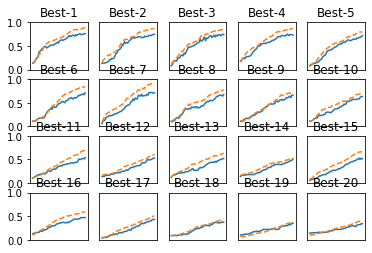

In [53]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

# 정리
- 매개변수 갱신 방법 : 확률적 경사 하강법(SGD), 모멘텀, AdaGrad, Adam, RMSprop 등
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요하다.
- 가중치의 초깃값으로는 Xavier초깃값과 He초깃값이 효과적이다.
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
- 오버피팅을 억제하는 정규화기술로는 가중치감소화 드롭아웃이 있다.
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.